In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Ads_Optimisation.csv')


In [4]:
import random
N = 10000
d = 10
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    total_reward = total_reward + reward

In [5]:
pd.Series(ads_selected).tail(1000).value_counts(normalize=True)

5    0.111
6    0.107
1    0.106
4    0.105
0    0.105
9    0.102
2    0.101
7    0.092
3    0.090
8    0.081
dtype: float64

In [6]:
# Implementing UCB
import math
N = 10000
d = 10
ads_selected = []
numbers_of_selections = [0] * d
sums_of_reward = [0] * d
total_reward = 0

In [7]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            delta_i = math.sqrt(2 * math.log(n+1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_reward[ad] += reward
    total_reward += reward

In [8]:
pd.Series(ads_selected).tail(1500).value_counts(normalize=True)

4    0.810000
0    0.077333
7    0.026667
3    0.024667
2    0.019333
6    0.019333
1    0.007333
8    0.006000
5    0.004667
9    0.004667
dtype: float64

Text(0, 0.5, 'Number of times each ad was selected by the algorithm')

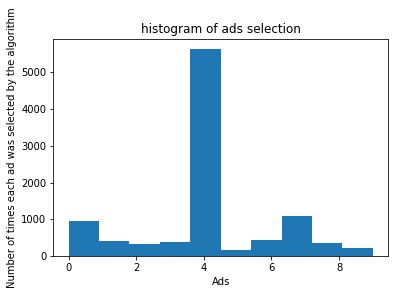

In [9]:
plt.hist(ads_selected)
plt.title('histogram of ads selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected by the algorithm')